<a href="https://colab.research.google.com/github/StevenWestmoreland/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/DS17_U4S2M2_TrainAssignment_StevenWestmoreland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
def load_quickdraw10(path):

  arr = np.load(path)
  X = arr['arr_0']
  y = arr['arr_1']

  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      train_size = 0.90,
                                                      test_size = 0.10,
                                                      random_state=42)

  return X_train, y_train, X_test, y_test

In [14]:
X_train, y_train, X_test, y_test = load_quickdraw10('quickdraw10.npz')

In [15]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
X_train.shape, y_train.shape

((90000, 784), (90000,))

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [39]:
def create_model(lr=.01):
  opt = SGD(learning_rate=lr)

  model = Sequential(
      [
       Dense(32, activation='sigmoid', input_dim=784),
       Dense(32, activation='sigmoid'),
       Dense(10, activation='softmax')       
      ]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [40]:
quickdraw_model = create_model()

In [41]:
quickdraw_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [42]:
quickdraw_model_32 = create_model()
batch_32 = quickdraw_model_32.fit(X_train, y_train, epochs=25, batch_size=32,
                                  validation_data=(X_test, y_test))

Epoch 1/25
2813/2813 [==============================] - 6s 2ms/step - loss: 1.8474 - accuracy: 0.4736 - val_loss: 1.4779 - val_accuracy: 0.5677
Epoch 2/25
2813/2813 [==============================] - 5s 2ms/step - loss: 1.2924 - accuracy: 0.6224 - val_loss: 1.1720 - val_accuracy: 0.6515
Epoch 3/25
2813/2813 [==============================] - 5s 2ms/step - loss: 1.1055 - accuracy: 0.6681 - val_loss: 1.0585 - val_accuracy: 0.6686
Epoch 4/25
2813/2813 [==============================] - 5s 2ms/step - loss: 1.0252 - accuracy: 0.6852 - val_loss: 0.9887 - val_accuracy: 0.6931
Epoch 5/25
2813/2813 [==============================] - 5s 2ms/step - loss: 0.9861 - accuracy: 0.6942 - val_loss: 0.9650 - val_accuracy: 0.6968
Epoch 6/25
2813/2813 [==============================] - 5s 2ms/step - loss: 0.9506 - accuracy: 0.7093 - val_loss: 0.9250 - val_accuracy: 0.7206
Epoch 7/25
2813/2813 [==============================] - 5s 2ms/step - loss: 0.9222 - accuracy: 0.7175 - val_loss: 0.9228 - val_accuracy:

In [43]:
quickdraw_model_8 = create_model()
batch_8 = quickdraw_model_8.fit(X_train, y_train, epochs=25, batch_size=8,
                                  validation_data=(X_test, y_test))

Epoch 1/25
11250/11250 [==============================] - 19s 2ms/step - loss: 1.4671 - accuracy: 0.5272 - val_loss: 1.2107 - val_accuracy: 0.6268
Epoch 2/25
11250/11250 [==============================] - 19s 2ms/step - loss: 1.1460 - accuracy: 0.6274 - val_loss: 1.0994 - val_accuracy: 0.6432
Epoch 3/25
11250/11250 [==============================] - 19s 2ms/step - loss: 1.1070 - accuracy: 0.6449 - val_loss: 1.0768 - val_accuracy: 0.6547
Epoch 4/25
11250/11250 [==============================] - 20s 2ms/step - loss: 1.1023 - accuracy: 0.6468 - val_loss: 1.1334 - val_accuracy: 0.6404
Epoch 5/25
11250/11250 [==============================] - 19s 2ms/step - loss: 1.0720 - accuracy: 0.6530 - val_loss: 1.0445 - val_accuracy: 0.6759
Epoch 6/25
11250/11250 [==============================] - 19s 2ms/step - loss: 1.0502 - accuracy: 0.6604 - val_loss: 0.9638 - val_accuracy: 0.6948
Epoch 7/25
11250/11250 [==============================] - 19s 2ms/step - loss: 1.0174 - accuracy: 0.6685 - val_loss: 0

In [44]:
quickdraw_model_16 = create_model()
batch_16 = quickdraw_model_16.fit(X_train, y_train, epochs=25, batch_size=16,
                                  validation_data=(X_test, y_test))

Epoch 1/25
5625/5625 [==============================] - 10s 2ms/step - loss: 1.5874 - accuracy: 0.5506 - val_loss: 1.2041 - val_accuracy: 0.6369
Epoch 2/25
5625/5625 [==============================] - 10s 2ms/step - loss: 1.1083 - accuracy: 0.6604 - val_loss: 1.0316 - val_accuracy: 0.6784
Epoch 3/25
5625/5625 [==============================] - 10s 2ms/step - loss: 1.0108 - accuracy: 0.6832 - val_loss: 0.9887 - val_accuracy: 0.6981
Epoch 4/25
5625/5625 [==============================] - 10s 2ms/step - loss: 0.9739 - accuracy: 0.6936 - val_loss: 0.9396 - val_accuracy: 0.6974
Epoch 5/25
5625/5625 [==============================] - 10s 2ms/step - loss: 0.9578 - accuracy: 0.6977 - val_loss: 0.9595 - val_accuracy: 0.6999
Epoch 6/25
5625/5625 [==============================] - 10s 2ms/step - loss: 0.9398 - accuracy: 0.7000 - val_loss: 0.9524 - val_accuracy: 0.6998
Epoch 7/25
5625/5625 [==============================] - 10s 2ms/step - loss: 0.9498 - accuracy: 0.6977 - val_loss: 0.9753 - val_ac

In [45]:
quickdraw_model_64 = create_model()
batch_64 = quickdraw_model_64.fit(X_train, y_train, epochs=25, batch_size=64,
                                  validation_data=(X_test, y_test))

Epoch 1/25
1407/1407 [==============================] - 3s 2ms/step - loss: 2.0320 - accuracy: 0.4078 - val_loss: 1.7869 - val_accuracy: 0.5026
Epoch 2/25
1407/1407 [==============================] - 3s 2ms/step - loss: 1.5929 - accuracy: 0.5630 - val_loss: 1.4393 - val_accuracy: 0.5975
Epoch 3/25
1407/1407 [==============================] - 3s 2ms/step - loss: 1.3379 - accuracy: 0.6203 - val_loss: 1.2582 - val_accuracy: 0.6376
Epoch 4/25
1407/1407 [==============================] - 3s 2ms/step - loss: 1.1907 - accuracy: 0.6607 - val_loss: 1.1337 - val_accuracy: 0.6748
Epoch 5/25
1407/1407 [==============================] - 3s 2ms/step - loss: 1.0886 - accuracy: 0.6909 - val_loss: 1.0518 - val_accuracy: 0.6969
Epoch 6/25
1407/1407 [==============================] - 3s 2ms/step - loss: 1.0183 - accuracy: 0.7045 - val_loss: 0.9878 - val_accuracy: 0.7103
Epoch 7/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.9656 - accuracy: 0.7174 - val_loss: 0.9532 - val_accuracy:

In [46]:
quickdraw_model_128 = create_model()
batch_128 = quickdraw_model_128.fit(X_train, y_train, epochs=25, batch_size=128,
                                  validation_data=(X_test, y_test))

Epoch 1/25
704/704 [==============================] - 2s 2ms/step - loss: 2.1862 - accuracy: 0.3242 - val_loss: 2.0392 - val_accuracy: 0.4602
Epoch 2/25
704/704 [==============================] - 1s 2ms/step - loss: 1.9094 - accuracy: 0.5098 - val_loss: 1.7761 - val_accuracy: 0.5479
Epoch 3/25
704/704 [==============================] - 1s 2ms/step - loss: 1.6595 - accuracy: 0.5688 - val_loss: 1.5574 - val_accuracy: 0.5893
Epoch 4/25
704/704 [==============================] - 1s 2ms/step - loss: 1.4699 - accuracy: 0.6094 - val_loss: 1.3996 - val_accuracy: 0.6158
Epoch 5/25
704/704 [==============================] - 1s 2ms/step - loss: 1.3349 - accuracy: 0.6415 - val_loss: 1.2893 - val_accuracy: 0.6513
Epoch 6/25
704/704 [==============================] - 1s 2ms/step - loss: 1.2368 - accuracy: 0.6612 - val_loss: 1.1996 - val_accuracy: 0.6709
Epoch 7/25
704/704 [==============================] - 1s 2ms/step - loss: 1.1603 - accuracy: 0.6762 - val_loss: 1.1342 - val_accuracy: 0.6781
Epoch 

In [47]:
batch_sizes = []

for exp, result in zip([batch_32, batch_8, batch_16, batch_64, batch_128],
                       ["32_", "8_", "16_", "64_", "128_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,1.847414,0.473611,1.477899,0.5677,0,32_
1,1.292367,0.622422,1.171995,0.6515,1,32_
2,1.105457,0.668056,1.058512,0.6686,2,32_
3,1.025177,0.685200,0.988721,0.6931,3,32_
4,0.986124,0.694244,0.965045,0.6968,4,32_


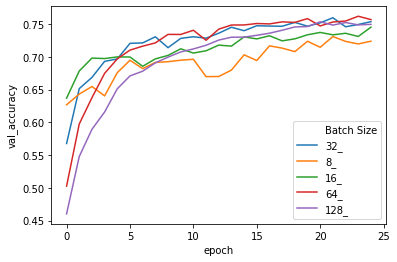

In [48]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

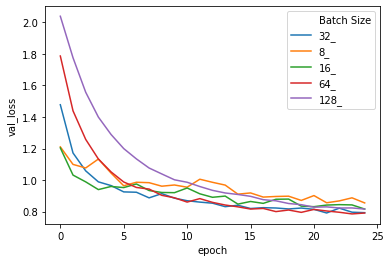

In [49]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [50]:
lr_default = create_model().fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
2813/2813 [==============================] - 6s 2ms/step - loss: 1.8228 - accuracy: 0.4714 - val_loss: 1.4396 - val_accuracy: 0.5834
Epoch 2/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.2704 - accuracy: 0.6363 - val_loss: 1.1517 - val_accuracy: 0.6693
Epoch 3/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.0925 - accuracy: 0.6791 - val_loss: 1.0296 - val_accuracy: 0.6931
Epoch 4/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.0093 - accuracy: 0.6994 - val_loss: 0.9965 - val_accuracy: 0.6948
Epoch 5/10
2813/2813 [==============================] - 6s 2ms/step - loss: 0.9616 - accuracy: 0.7066 - val_loss: 0.9398 - val_accuracy: 0.7139
Epoch 6/10
2813/2813 [==============================] - 5s 2ms/step - loss: 0.9354 - accuracy: 0.7133 - val_loss: 0.9341 - val_accuracy: 0.7157
Epoch 7/10
2813/2813 [==============================] - 5s 2ms/step - loss: 0.9116 - accuracy: 0.7199 - val_loss: 0.9265 - val_accuracy:

In [51]:
lr_high = create_model(lr=.1).fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
2813/2813 [==============================] - 6s 2ms/step - loss: 1.5164 - accuracy: 0.4819 - val_loss: 1.3627 - val_accuracy: 0.5356
Epoch 2/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.3699 - accuracy: 0.5252 - val_loss: 1.3375 - val_accuracy: 0.5469
Epoch 3/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.3294 - accuracy: 0.5441 - val_loss: 1.3550 - val_accuracy: 0.4898
Epoch 4/10
2813/2813 [==============================] - 6s 2ms/step - loss: 1.2742 - accuracy: 0.5532 - val_loss: 1.2759 - val_accuracy: 0.5563
Epoch 5/10
2813/2813 [==============================] - 6s 2ms/step - loss: 1.2053 - accuracy: 0.5947 - val_loss: 1.1981 - val_accuracy: 0.5807
Epoch 6/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.1880 - accuracy: 0.5963 - val_loss: 1.2390 - val_accuracy: 0.5813
Epoch 7/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.1525 - accuracy: 0.6124 - val_loss: 1.1447 - val_accuracy:

In [52]:
lr_extra_high = create_model(lr=1.0).fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.9957 - accuracy: 0.2378 - val_loss: 1.9596 - val_accuracy: 0.2922
Epoch 2/10
2813/2813 [==============================] - 6s 2ms/step - loss: 1.8668 - accuracy: 0.3014 - val_loss: 1.9276 - val_accuracy: 0.3170
Epoch 3/10
2813/2813 [==============================] - 6s 2ms/step - loss: 1.9933 - accuracy: 0.2637 - val_loss: 1.9491 - val_accuracy: 0.2907
Epoch 4/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.9782 - accuracy: 0.2557 - val_loss: 1.8716 - val_accuracy: 0.3180
Epoch 5/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.9341 - accuracy: 0.2806 - val_loss: 1.9046 - val_accuracy: 0.2813
Epoch 6/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.9190 - accuracy: 0.2774 - val_loss: 1.9407 - val_accuracy: 0.2329
Epoch 7/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.9349 - accuracy: 0.2419 - val_loss: 1.9367 - val_accuracy:

In [53]:
lr_low = create_model(lr=.001).fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
2813/2813 [==============================] - 6s 2ms/step - loss: 2.2738 - accuracy: 0.2116 - val_loss: 2.2032 - val_accuracy: 0.3242
Epoch 2/10
2813/2813 [==============================] - 5s 2ms/step - loss: 2.1571 - accuracy: 0.3782 - val_loss: 2.1125 - val_accuracy: 0.4115
Epoch 3/10
2813/2813 [==============================] - 5s 2ms/step - loss: 2.0648 - accuracy: 0.4414 - val_loss: 2.0177 - val_accuracy: 0.4583
Epoch 4/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.9667 - accuracy: 0.4745 - val_loss: 1.9179 - val_accuracy: 0.4922
Epoch 5/10
2813/2813 [==============================] - 6s 2ms/step - loss: 1.8652 - accuracy: 0.5004 - val_loss: 1.8176 - val_accuracy: 0.5121
Epoch 6/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.7658 - accuracy: 0.5213 - val_loss: 1.7214 - val_accuracy: 0.5299
Epoch 7/10
2813/2813 [==============================] - 5s 2ms/step - loss: 1.6741 - accuracy: 0.5375 - val_loss: 1.6350 - val_accuracy:

In [54]:
lr_extra_low = create_model(lr=.0001).fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
2813/2813 [==============================] - 6s 2ms/step - loss: 2.4215 - accuracy: 0.1043 - val_loss: 2.3780 - val_accuracy: 0.1039
Epoch 2/10
2813/2813 [==============================] - 5s 2ms/step - loss: 2.3465 - accuracy: 0.1134 - val_loss: 2.3204 - val_accuracy: 0.1188
Epoch 3/10
2813/2813 [==============================] - 6s 2ms/step - loss: 2.3009 - accuracy: 0.1322 - val_loss: 2.2835 - val_accuracy: 0.1455
Epoch 4/10
2813/2813 [==============================] - 5s 2ms/step - loss: 2.2708 - accuracy: 0.1602 - val_loss: 2.2583 - val_accuracy: 0.1812
Epoch 5/10
2813/2813 [==============================] - 6s 2ms/step - loss: 2.2492 - accuracy: 0.1900 - val_loss: 2.2392 - val_accuracy: 0.2091
Epoch 6/10
2813/2813 [==============================] - 6s 2ms/step - loss: 2.2316 - accuracy: 0.2197 - val_loss: 2.2236 - val_accuracy: 0.2362
Epoch 7/10
2813/2813 [==============================] - 5s 2ms/step - loss: 2.2171 - accuracy: 0.2451 - val_loss: 2.2097 - val_accuracy:

In [55]:
batch_sizes = []

for exp, result in zip([lr_default, lr_high, lr_extra_high, lr_low,
                        lr_extra_low], [".01_", ".1_", "1.0_", ".001_",
                                        ".0001_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,1.822776,0.471356,1.439595,0.5834,0,.01_
1,1.270380,0.636267,1.151708,0.6693,1,.01_
2,1.092501,0.679067,1.029592,0.6931,2,.01_
3,1.009328,0.699389,0.996484,0.6948,3,.01_
4,0.961604,0.706567,0.939824,0.7139,4,.01_


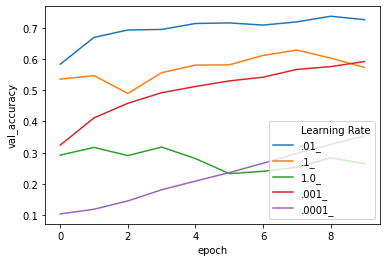

In [56]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

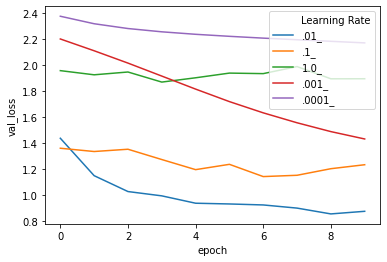

In [57]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


